## DSC 540 - Project 2

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
%config InlineBackend.figure_format ='retina'
RANDOM_STATE = 42

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,balanced_accuracy_score,precision_score,recall_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split

# Q1
- Read in the dataset `loan_data.csv`
- How many rows and variables are there?
- What are the unique values of `not.fully.paid`?
- `not.fully.paid` having a value of 1 means that the person who took the loan did not fully pay it back. What's the proportion of those people in the full dataset?

In [7]:
loans = pd.read_csv("C:\\Users\\wodnj\\OneDrive\\바탕 화면\\Advanced Machine Learning\\DSC 540 - Week 4\\Data File\\loans.csv")

In [8]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2981 entries, 0 to 2980
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      2981 non-null   int64  
 1   purpose            2981 non-null   object 
 2   int.rate           2981 non-null   float64
 3   installment        2981 non-null   float64
 4   log.annual.inc     2981 non-null   float64
 5   dti                2981 non-null   float64
 6   fico               2981 non-null   int64  
 7   days.with.cr.line  2981 non-null   float64
 8   revol.bal          2981 non-null   int64  
 9   revol.util         2981 non-null   float64
 10  inq.last.6mths     2981 non-null   int64  
 11  delinq.2yrs        2981 non-null   int64  
 12  pub.rec            2981 non-null   int64  
 13  not.fully.paid     2981 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 326.2+ KB


In [9]:
num_rows = loans.shape[0] # calculate the number of rows
num_cols = loans.shape[1] # calculate the number of columns
print(f"There are {num_rows} rows and {num_cols} variables.") 

There are 2981 rows and 14 variables.


In [10]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1183,231.94,10.348846,5.69,712,2460.958333,6955,63.8,1,0,0,0
1,1,major_purchase,0.0774,124.88,11.264464,7.17,792,6360.041667,168,0.7,0,0,0,0
2,1,credit_card,0.1505,86.73,11.184421,16.30,667,3600.000000,16242,95.5,0,0,0,0
3,1,debt_consolidation,0.1284,403.42,10.736397,19.57,697,3450.041667,27261,87.4,1,0,0,0
4,1,debt_consolidation,0.1531,278.53,10.621327,8.20,662,1860.000000,7979,48.7,0,1,0,0


In [11]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,2981.000000,2981.000000,2981.000000,2981.000000,2981.000000,2981.000000,2981.000000,2.981000e+03,2981.000000,2981.000000,2981.000000,2981.000000,2981.000000
mean,0.748071,0.125977,326.020778,10.898762,12.794119,705.839316,4460.703008,1.826035e+04,48.442170,1.868165,0.171419,0.073465,0.480711
std,0.434193,0.026565,213.108504,0.650773,6.986455,37.073906,2486.531742,4.029009e+04,29.251287,2.567033,0.526928,0.271035,0.499712
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,180.041667,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.109600,165.630000,10.498250,7.170000,677.000000,2760.041667,2.979000e+03,24.700000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.125300,275.570000,10.915088,12.870000,702.000000,4043.000000,8.493000e+03,48.800000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.142600,457.050000,11.289782,18.350000,732.000000,5640.041667,1.853800e+04,72.500000,3.000000,0.000000,0.000000,1.000000
max,1.000000,0.216400,926.830000,14.124465,29.960000,817.000000,17616.000000,1.207359e+06,119.000000,33.000000,6.000000,3.000000,1.000000


In [98]:
not_fully_paid_unique = list(loans['not.fully.paid'].unique())
print(f"The unique values of not.fully.paid are {not_fully_paid_unique}.")

The unique values of not.fully.paid are [0, 1].


In [100]:
not_fully_paid = loans[loans['not.fully.paid'] == 1].shape[0]
proportion = not_fully_paid / loans.shape[0]
print(f"The proportion of people who are not fully paid loan back is {proportion}.")

The proportion of people who are not fully paid loan back is 0.4807111707480711.


# Q2
- Visual and Exploratory Analysis
- Carry out the tasks given below

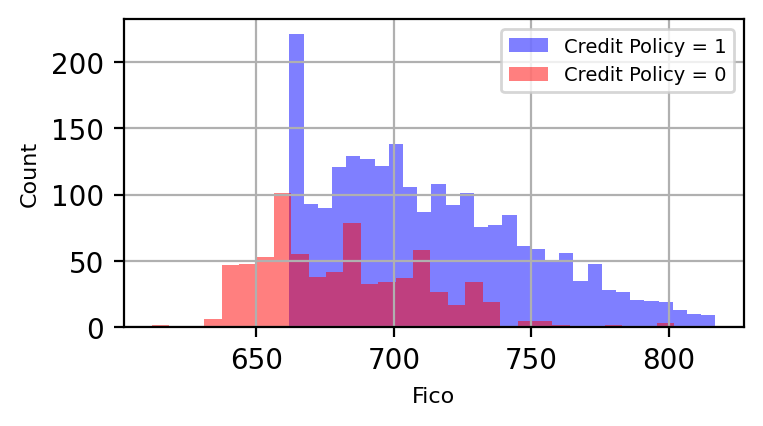

In [14]:
credit_policy_1_fico = loans[loans['credit.policy'] == 1]['fico']
credit_policy_0_fico = loans[loans['credit.policy'] == 0]['fico']

plt.figure(figsize = (4, 2))
plt.hist(credit_policy_1_fico, bins = 30, alpha = 0.5, label = 'Credit Policy = 1', color = 'blue')
plt.hist(credit_policy_0_fico, bins = 30, alpha = 0.5, label = 'Credit Policy = 0', color = 'red')
plt.xlabel('Fico', fontsize = 8)
plt.ylabel('Count', fontsize = 8)
plt.legend(loc = 'upper right', prop = {'size': 7})
plt.grid(True)
plt.show()

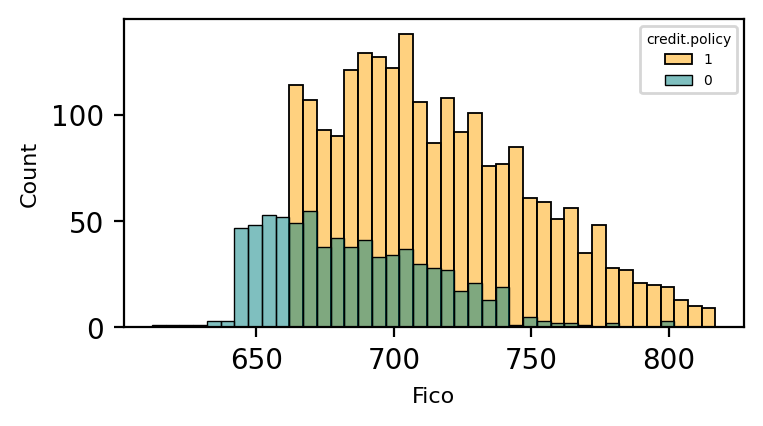

In [16]:
plt.figure(figsize = (4, 2))
sns.histplot(credit_policy_1_fico, bins = 30, binwidth = 5, alpha = 0.5, label = '1', color = 'orange')
sns.histplot(credit_policy_0_fico, bins = 30, binwidth = 5, alpha = 0.5, label = '0', color = 'teal')
plt.xlabel('Fico', fontsize = 8)
plt.ylabel('Count', fontsize = 8)
plt.legend(title = 'credit.policy', title_fontsize = 5, loc = 'upper right', prop = {'size': 5})
plt.show()

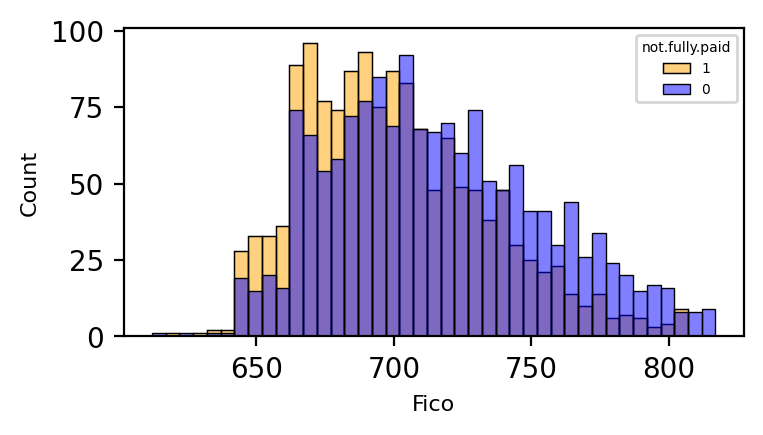

In [17]:
not_fully_paid_1 = loans[loans['not.fully.paid'] == 1]['fico']
not_fully_paid_0 = loans[loans['not.fully.paid'] == 0]['fico']

plt.figure(figsize = (4, 2))
sns.histplot(not_fully_paid_1, bins = 30, binwidth = 5, alpha = 0.5, label = '1', color = 'orange')
sns.histplot(not_fully_paid_0, bins = 30, binwidth = 5, alpha = 0.5, label = '0', color = 'blue')
plt.xlabel('Fico', fontsize = 8)
plt.ylabel('Count', fontsize = 8)
plt.legend(title = 'not.fully.paid', title_fontsize = 5, loc = 'upper right', prop = {'size': 5})
plt.show()

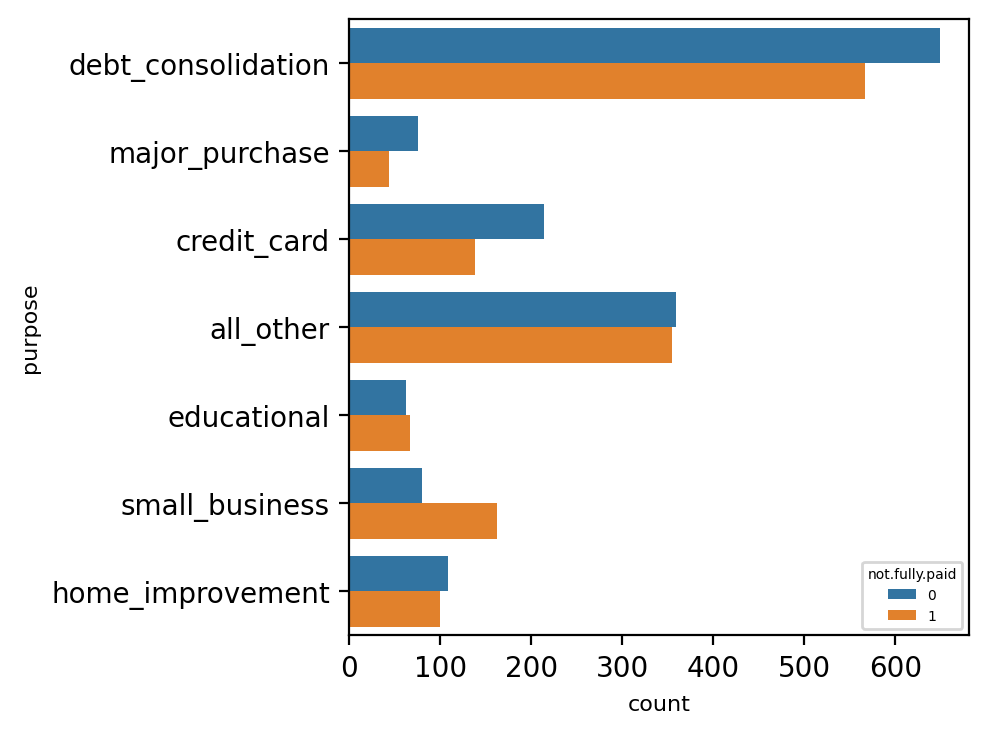

In [18]:
plt.figure(figsize = (4, 4))
sns.countplot(data = loans, y = 'purpose', hue = 'not.fully.paid')
plt.xlabel('count', fontsize = 8)
plt.ylabel('purpose', fontsize = 8)
plt.legend(title = 'not.fully.paid', title_fontsize = 5, loc = 'lower right', prop = {'size': 5})
plt.show()

<Figure size 200x200 with 0 Axes>

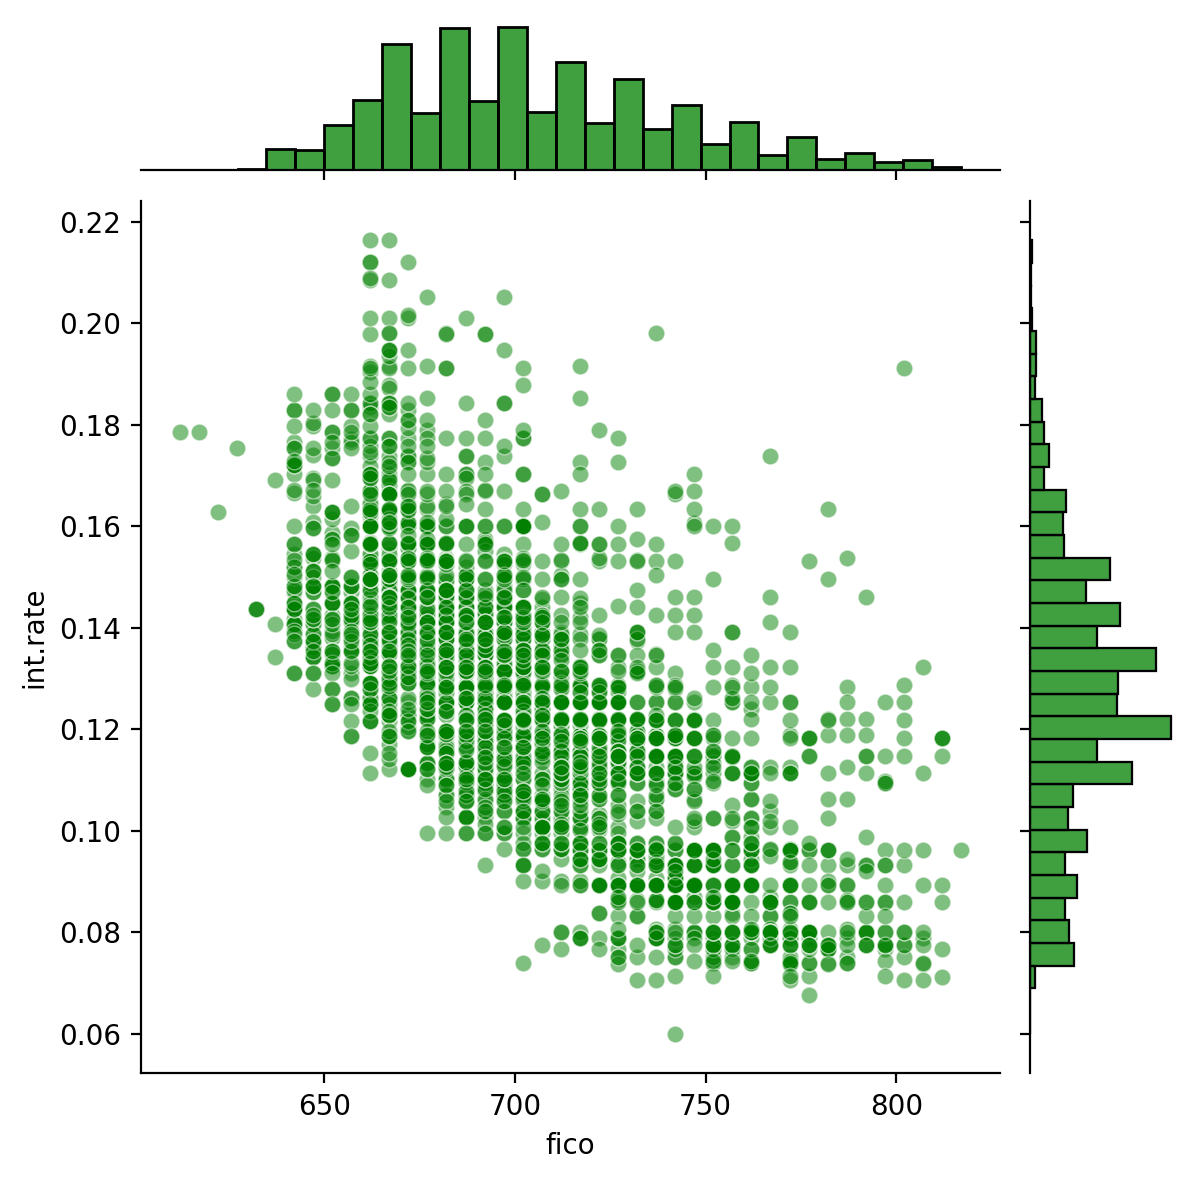

In [19]:
plt.figure(figsize = (2, 2))
sns.jointplot(data = loans, x = 'fico', y = 'int.rate', kind = 'scatter', alpha = 0.5, color = 'green')
plt.xlabel('fico')
plt.ylabel('int.rate')
plt.show()

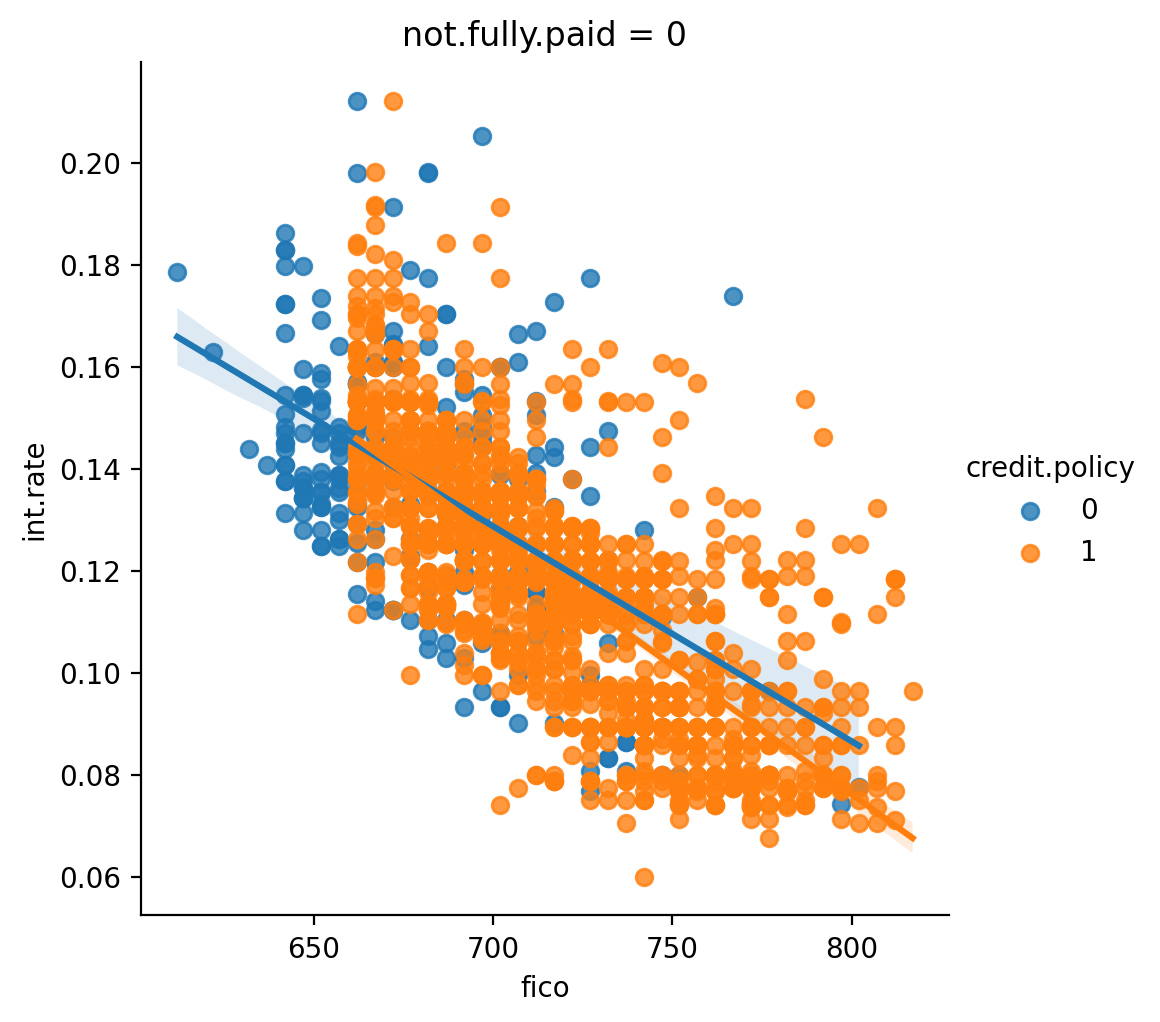

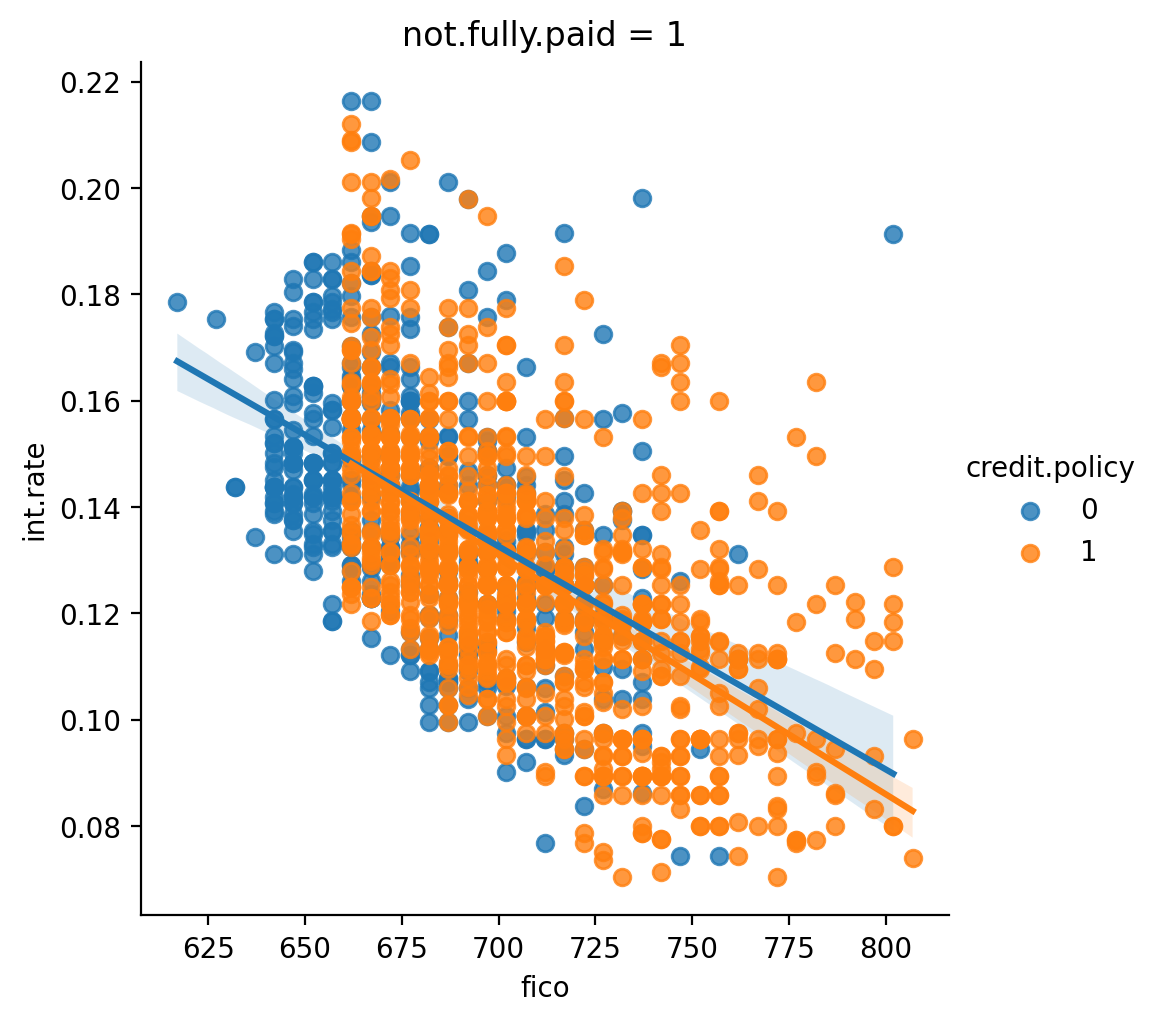

In [20]:
sns.lmplot(x = 'fico', y = 'int.rate', hue = 'credit.policy', data = loans[loans['not.fully.paid'] == 0], fit_reg = True)
plt.xlabel('fico')
plt.ylabel('int.rate')
plt.title('not.fully.paid = 0')

sns.lmplot(x = 'fico', y = 'int.rate', hue = 'credit.policy', data = loans[loans['not.fully.paid'] == 1], fit_reg = True)
plt.xlabel('fico')
plt.ylabel('int.rate')
plt.title('not.fully.paid = 1')

plt.show()

# Q3

In [22]:
cat_feats = ['purpose']

In [23]:
loans = pd.get_dummies(loans, columns = cat_feats, drop_first = False)

In [24]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2981 entries, 0 to 2980
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               2981 non-null   int64  
 1   int.rate                    2981 non-null   float64
 2   installment                 2981 non-null   float64
 3   log.annual.inc              2981 non-null   float64
 4   dti                         2981 non-null   float64
 5   fico                        2981 non-null   int64  
 6   days.with.cr.line           2981 non-null   float64
 7   revol.bal                   2981 non-null   int64  
 8   revol.util                  2981 non-null   float64
 9   inq.last.6mths              2981 non-null   int64  
 10  delinq.2yrs                 2981 non-null   int64  
 11  pub.rec                     2981 non-null   int64  
 12  not.fully.paid              2981 non-null   int64  
 13  purpose_all_other           2981 

In [25]:
loans.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1183,231.94,10.348846,5.69,712,2460.958333,6955,63.8,1,0,0,0,False,False,True,False,False,False,False
1,1,0.0774,124.88,11.264464,7.17,792,6360.041667,168,0.7,0,0,0,0,False,False,False,False,False,True,False
2,1,0.1505,86.73,11.184421,16.30,667,3600.000000,16242,95.5,0,0,0,0,False,True,False,False,False,False,False
3,1,0.1284,403.42,10.736397,19.57,697,3450.041667,27261,87.4,1,0,0,0,False,False,True,False,False,False,False
4,1,0.1531,278.53,10.621327,8.20,662,1860.000000,7979,48.7,0,1,0,0,False,False,True,False,False,False,False


In [28]:
X = loans.drop('not.fully.paid',axis = 1)
y = loans['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state = RANDOM_STATE)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.50, random_state = RANDOM_STATE)

<Axes: xlabel='not.fully.paid'>

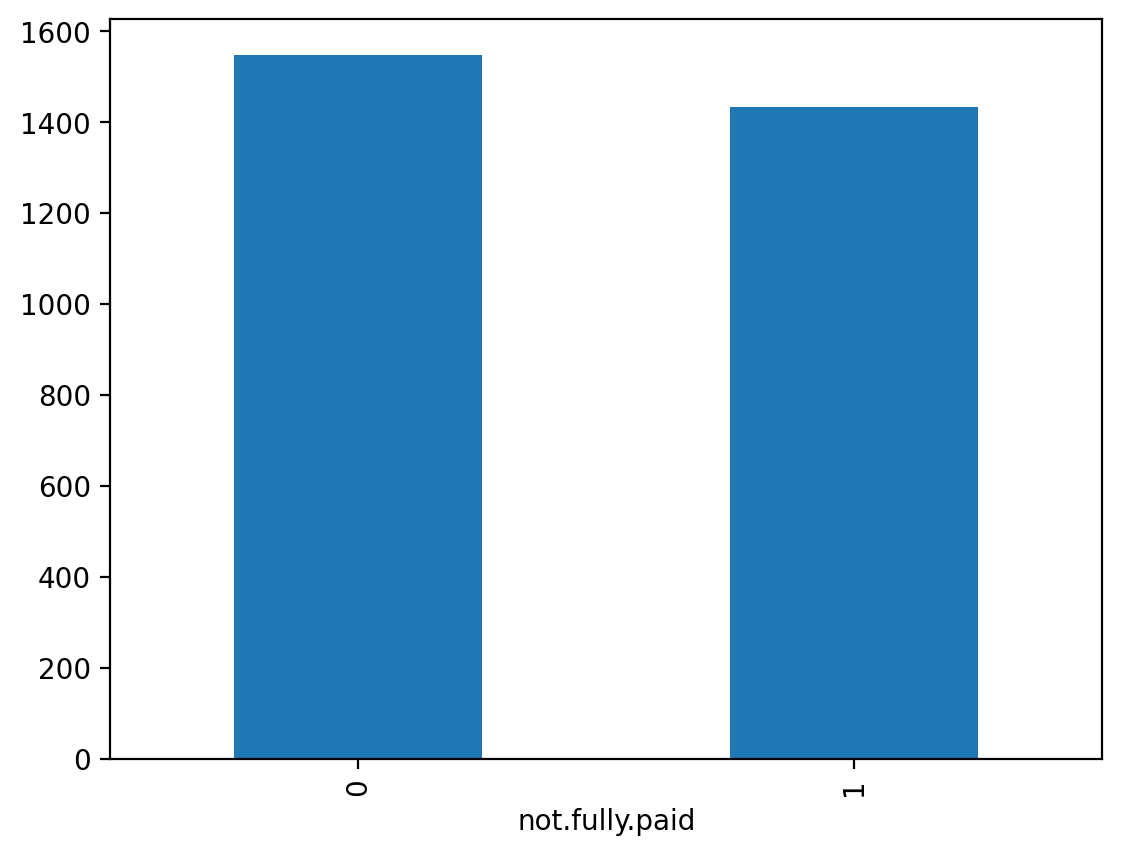

In [29]:
y.value_counts().plot(kind = 'bar')

<Axes: xlabel='not.fully.paid'>

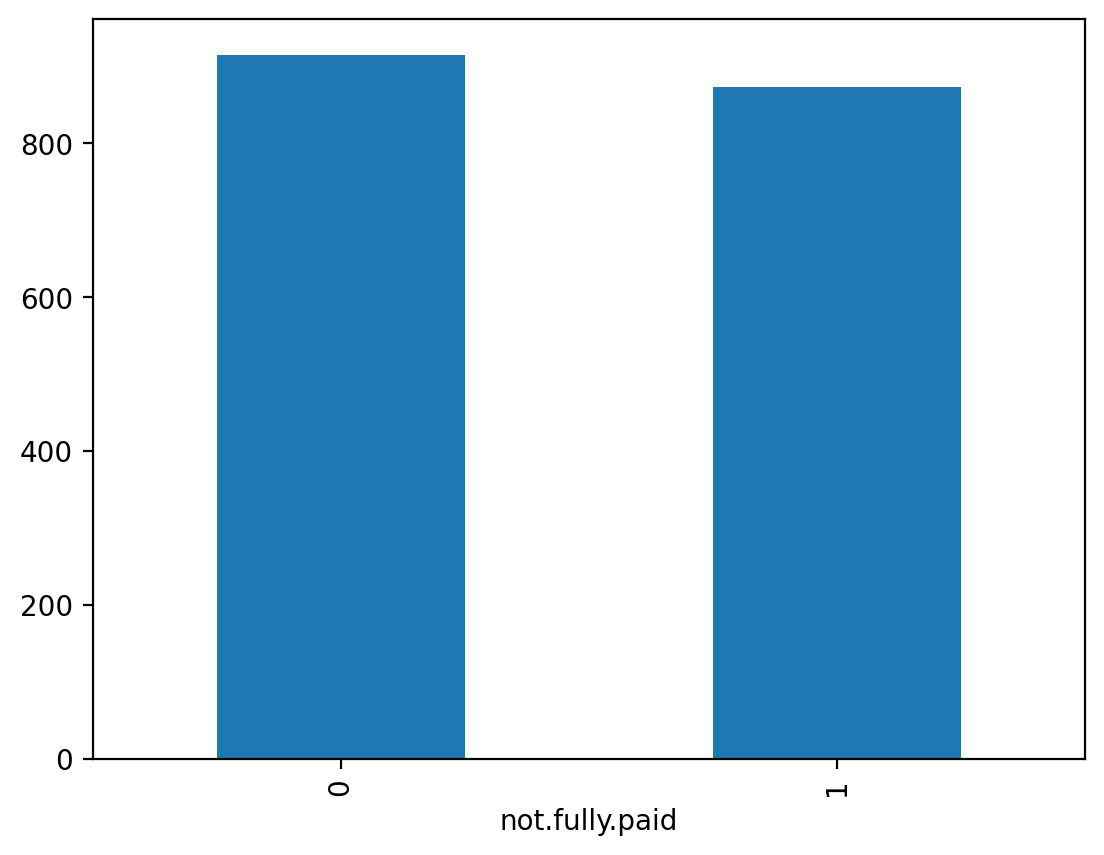

In [30]:
y_train.value_counts().plot(kind = 'bar')

<Axes: xlabel='not.fully.paid'>

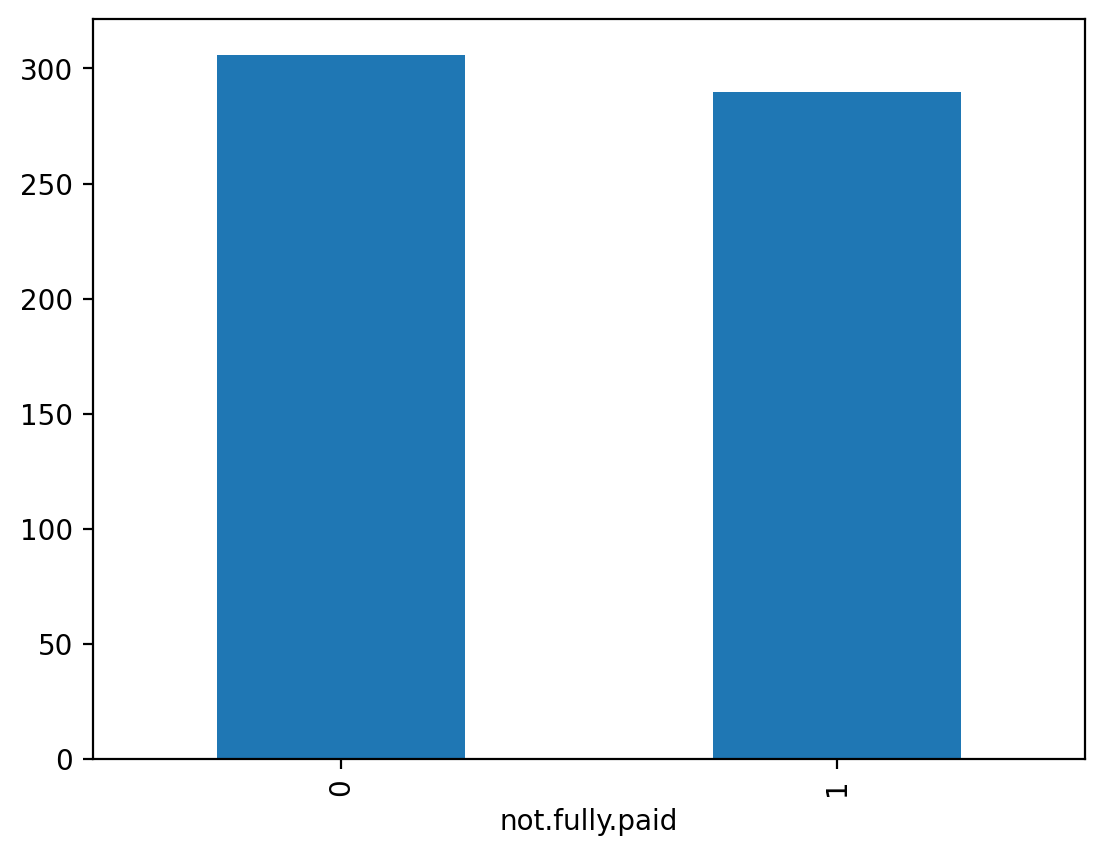

In [31]:
y_val.value_counts().plot(kind = 'bar')

# Q4

1. Default decision tree:
    - Initiate the Decision Tree classifier from the sklearn library. Keep all parameters with their default values. (No need to specify anything)
    - Fit the model
    - Make predictions
    - Calculate accuracy score. What are the **training** and **validation** accuracies of the model?
    - Create confusion matrix
    - Provide the performance metrics for the **validation** set.


2. Using the training data perform hyper-parameter tuning. Use an appropriate metric for scoring (f1 is generally good).
    - Try several values for the `min_samples_split` hyper-parameter and apply cross validation (`GridSearchCV`) to find the best value.  
        - Using the best model provide the performance metrics for the validation set.
    - Try several values for the `max_depth` hyper-parameter and apply cross validation (`GridSearchCV`) to find the best value. 
        - Using the best model provide the performance metrics for the validation set.
    - Perform grid search (`GridSearchCV`) where you check for `min_samples_split` and `max_depth`.
        - Using the best model provide the performance metrics for the validation set.
        
        
3. Create a chart showing the feature importances based on the best model obtained.

### Default Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier() # initiate model
dt.fit(X_train, y_train) # fit the model

pred_train_dt = dt.predict(X_train) # prediction on the training data
pred_val_dt = dt.predict(X_val) # prediction on the validation data
pred_test_dt = dt.predict(X_test) # prediction on the testing data

print("Training accuracy of the model is", accuracy_score(y_train, pred_train_dt))
print("Validation accuracy of the model is", accuracy_score(y_val, pred_val_dt))
print("Testing accuracy of the model is", accuracy_score(y_test, pred_test_dt))

Training accuracy of the model is 1.0
Validation accuracy of the model is 0.5587248322147651
Testing accuracy of the model is 0.592964824120603


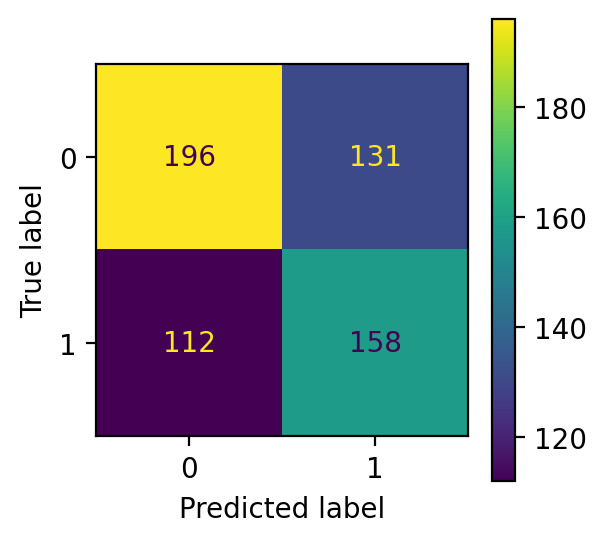

In [34]:
cm_test_dt = confusion_matrix(y_test, pred_test_dt) # generate the confusion matrix

fig, ax = plt.subplots(figsize = (3, 3))
ConfusionMatrixDisplay(confusion_matrix = cm_test_dt, display_labels = [0, 1]).plot(ax = ax)
plt.show()

In [35]:
cm_val_dt = confusion_matrix(y_val, pred_val_dt) # generate the confusion matrix

# performance metrics
print('Recall score: ', recall_score(y_val, pred_val_dt))
print('Specificity: ', cm_val_dt[0, 0] / (cm_val_dt[0, 0] + cm_val_dt[0, 1]))
print('Precision score: ', precision_score(y_val, pred_val_dt))
print('Balanced Accuracy score: ', balanced_accuracy_score(y_val, pred_val_dt))
print('F1 score: ', f1_score(y_val, pred_val_dt))

Recall score:  0.5689655172413793
Specificity:  0.5490196078431373
Precision score:  0.5445544554455446
Balanced Accuracy score:  0.5589925625422583
F1 score:  0.5564924114671164


### Hyper-parameter Tuning

##### With 'min_samples_split'

In [36]:
dt = DecisionTreeClassifier() # initiate model
min_samples_split_dt = {'min_samples_split': [3, 5, 10, 15, 25, 50]} # define the parameter grid
grid_search_dt = GridSearchCV(estimator = dt, param_grid = min_samples_split_dt, cv = 10) # set up GridSearchCV
grid_search_dt.fit(X_train, y_train) # fit the data
print(f"The best min_samples_split value is {grid_search_dt.best_params_}.")

The best min_samples_split value is {'min_samples_split': 50}.


In [37]:
best_min_samples_split_dt = grid_search_dt.best_estimator_ # get the best model
best_min_samples_split_pred_val_dt = best_min_samples_split_dt.predict(X_val) # prediction on the validation data

cm_best_min_samples_split_dt = confusion_matrix(y_val, best_min_samples_split_pred_val_dt) # generate the confusion matrix

# performance metrics
print('Recall score: ', recall_score(y_val, best_min_samples_split_pred_val_dt))
print('Specificity: ', cm_best_min_samples_split_dt[0, 0] / (cm_best_min_samples_split_dt[0, 0] + cm_best_min_samples_split_dt[0, 1]))
print('Precision score: ', precision_score(y_val, best_min_samples_split_pred_val_dt))
print('Balanced Accuracy score: ', balanced_accuracy_score(y_val, best_min_samples_split_pred_val_dt))
print('F1 score: ', f1_score(y_val, best_min_samples_split_pred_val_dt))

Recall score:  0.4896551724137931
Specificity:  0.6830065359477124
Precision score:  0.5941422594142259
Balanced Accuracy score:  0.5863308541807528
F1 score:  0.5368620037807184


##### With 'max_depth'

In [38]:
dt = DecisionTreeClassifier() # initiate model
max_depth_dt = {'max_depth': [3, 5, 10, 20]} # define the parameter grid
grid_search_dt = GridSearchCV(estimator = dt, param_grid = max_depth_dt, cv = 10) # set up GridSearchCV
grid_search_dt.fit(X_train, y_train) # fit the data
print(f"The best max_depth is {grid_search_dt.best_params_}.")

The best max_depth is {'max_depth': 3}.


In [39]:
best_max_depth_dt = grid_search_dt.best_estimator_ # get the best model
best_max_depth_pred_val_dt = best_max_depth_dt.predict(X_val) # prediction on the validation data

cm_best_max_depth_dt = confusion_matrix(y_val, best_max_depth_pred_val_dt) # generate the confusion matrix

# performance metrics
print('Recall score: ', recall_score(y_val, best_max_depth_pred_val_dt))
print('Specificity: ', cm_best_max_depth_dt[0, 0] / (cm_best_max_depth_dt[0, 0] + cm_best_max_depth_dt[0, 1]))
print('Precision score: ', precision_score(y_val, best_max_depth_pred_val_dt))
print('Balanced Accuracy score: ', balanced_accuracy_score(y_val, best_max_depth_pred_val_dt))
print('F1 score: ', f1_score(y_val, best_max_depth_pred_val_dt))

Recall score:  0.36551724137931035
Specificity:  0.8169934640522876
Precision score:  0.654320987654321
Balanced Accuracy score:  0.591255352715799
F1 score:  0.4690265486725664


##### With 'min_samples_split' and 'max_depth'

In [40]:
dt = DecisionTreeClassifier() # initiate model
hyper_parameters_dt = {'min_samples_split': [3, 5, 10, 15, 25, 50],  # define the parameter grid
                       'max_depth': [3, 5, 10, 20]} 
grid_search_dt = GridSearchCV(estimator = dt, param_grid = hyper_parameters_dt, cv = 10) # set up GridSearchCV
grid_search_dt.fit(X_train, y_train) # fit the data
print(f"The best hyper parameters are {grid_search_dt.best_params_}.")

The best hyper parameters are {'max_depth': 3, 'min_samples_split': 25}.


In [41]:
best_hyper_parameters_dt = grid_search_dt.best_estimator_  # get the best model
best_hyper_parameters_pred_val_dt = best_hyper_parameters_dt.predict(X_val) # prediction on the validation data

cm_best_hyper_parameters_dt = confusion_matrix(y_val, best_hyper_parameters_pred_val_dt) # generate the confusion matrix

# performance metrics
print('Recall score: ', recall_score(y_val, best_hyper_parameters_pred_val_dt))
print('Specificity: ', cm_best_hyper_parameters_dt[0, 0] / (cm_best_hyper_parameters_dt[0, 0] + cm_best_hyper_parameters_dt[0, 1]))
print('Precision score: ', precision_score(y_val, best_hyper_parameters_pred_val_dt))
print('Balanced Accuracy score: ', balanced_accuracy_score(y_val, best_hyper_parameters_pred_val_dt))
print('F1 score: ', f1_score(y_val, best_hyper_parameters_pred_val_dt))

Recall score:  0.3689655172413793
Specificity:  0.8137254901960784
Precision score:  0.6524390243902439
Balanced Accuracy score:  0.5913455037187288
F1 score:  0.4713656387665198


### Feature Importances

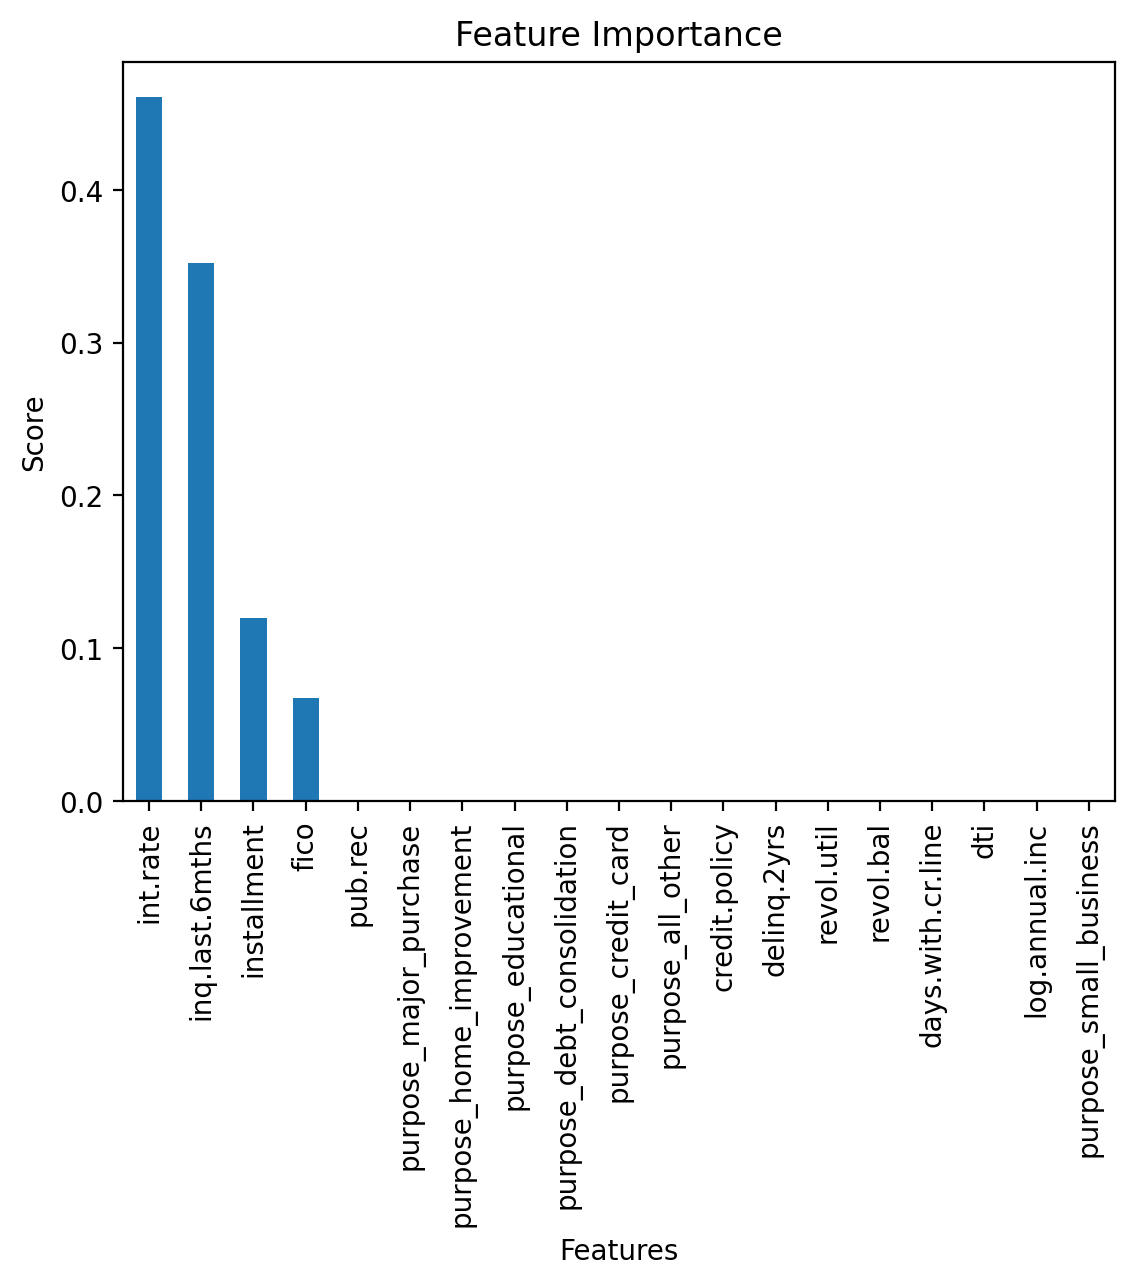

In [42]:
features = X_train.columns # get the names of the features
features_importances = best_hyper_parameters_dt.feature_importances_ # get the importance features
features_importances = pd.Series(features_importances, index = features).sort_values(ascending = False)
features_importances.plot(kind = 'bar') # plot a bar chart

plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Score')
plt.show()

# Q5

1. Default Random Forest Classifier:
    - Initiate the Random Forest Classifier from the sklearn library. Keep all parameters with their default values. (No need to specify anything)
    - Fit the model
    - Make predictions
    - Calculate accuracy score. What are the **training** and **validation** accuracies of the model?
    - Create confusion matrix
    - Provide the performance metrics for the **validation** set.
    
    
2. Using the training data perform hyper-parameter tuning. Use an appropriate metric for scoring (f1 is generally good).
    - Perform grid search (`GridSearchCV`) where you check for `min_samples_split`, `max_depth`, and `n_estimators`.
        - Using the best model provide the performance metrics for the validation set.
       
3. Create a chart showing the feature importances based on the best model obtained.

### Default Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier() # initiate model
rf.fit(X_train, y_train) # fit the model

pred_train_rf = rf.predict(X_train) # prediction on the training data
pred_val_rf = rf.predict(X_val) # prediction on the validation data
pred_test_rf = rf.predict(X_test) # prediction on the testing data

print("Training accuracy of the model is", accuracy_score(y_train, pred_train_rf))
print("Validation accuracy of the model is", accuracy_score(y_val, pred_val_rf))
print("Testing accuracy of the model is", accuracy_score(y_test, pred_test_rf))

Training accuracy of the model is 1.0
Validation accuracy of the model is 0.6023489932885906
Testing accuracy of the model is 0.5862646566164154


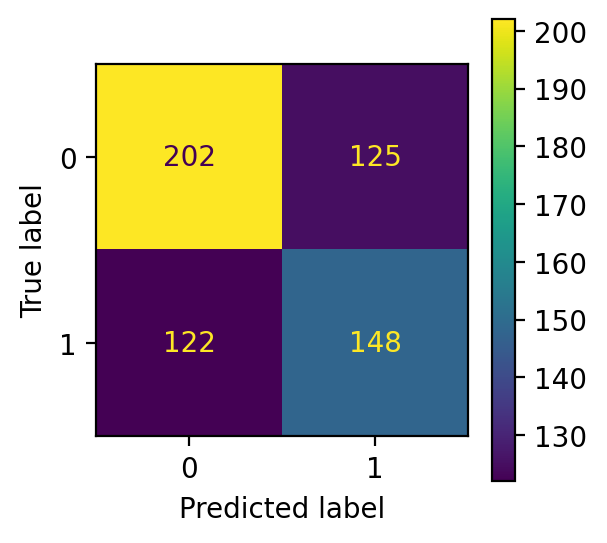

In [45]:
cm_test_rf = confusion_matrix(y_test, pred_test_rf) # generate the confusion matrix

fig, ax = plt.subplots(figsize = (3, 3))
ConfusionMatrixDisplay(confusion_matrix = cm_test_rf, display_labels = [0, 1]).plot(ax = ax)
plt.show()

### Hyper-parameter Tuning

In [46]:
rf = RandomForestClassifier() # initiate model
hyper_parameters_rf = {'min_samples_split': [3, 5, 10, 15, 25, 50], # define the parameter grid
                       'max_depth': [3, 5, 10, 20],
                       'n_estimators': [50, 100, 200]}
grid_search_rf = GridSearchCV(estimator = rf, param_grid = hyper_parameters_rf, cv = 10) # set up GridSearchCV
grid_search_rf.fit(X_train, y_train) # fit the data
print(f"The best hyper parameters are {grid_search_rf.best_params_}.")

The best hyper parameters are {'max_depth': 20, 'min_samples_split': 50, 'n_estimators': 200}.


In [47]:
best_hyper_parameters_rf = grid_search_rf.best_estimator_ # get the best model
best_hyper_parameters_pred_val_rf = best_hyper_parameters_rf.predict(X_val) # prediction on the validation data

cm_best_hyper_parameters_rf = confusion_matrix(y_val, best_hyper_parameters_pred_val_rf) # generate the confusion matrix

# performance metrics
print('Recall score: ', recall_score(y_val, best_hyper_parameters_pred_val_rf))
print('Specificity: ', cm_best_hyper_parameters_rf[0, 0] / (cm_best_hyper_parameters_rf[0, 0] + cm_best_hyper_parameters_rf[0, 1]))
print('Precision score: ', precision_score(y_val, best_hyper_parameters_pred_val_rf))
print('Balanced Accuracy score: ', balanced_accuracy_score(y_val, best_hyper_parameters_pred_val_rf))
print('F1 score: ', f1_score(y_val, best_hyper_parameters_pred_val_rf))

Recall score:  0.6275862068965518
Specificity:  0.6078431372549019
Precision score:  0.6026490066225165
Balanced Accuracy score:  0.6177146720757268
F1 score:  0.6148648648648649


### Feature Importances

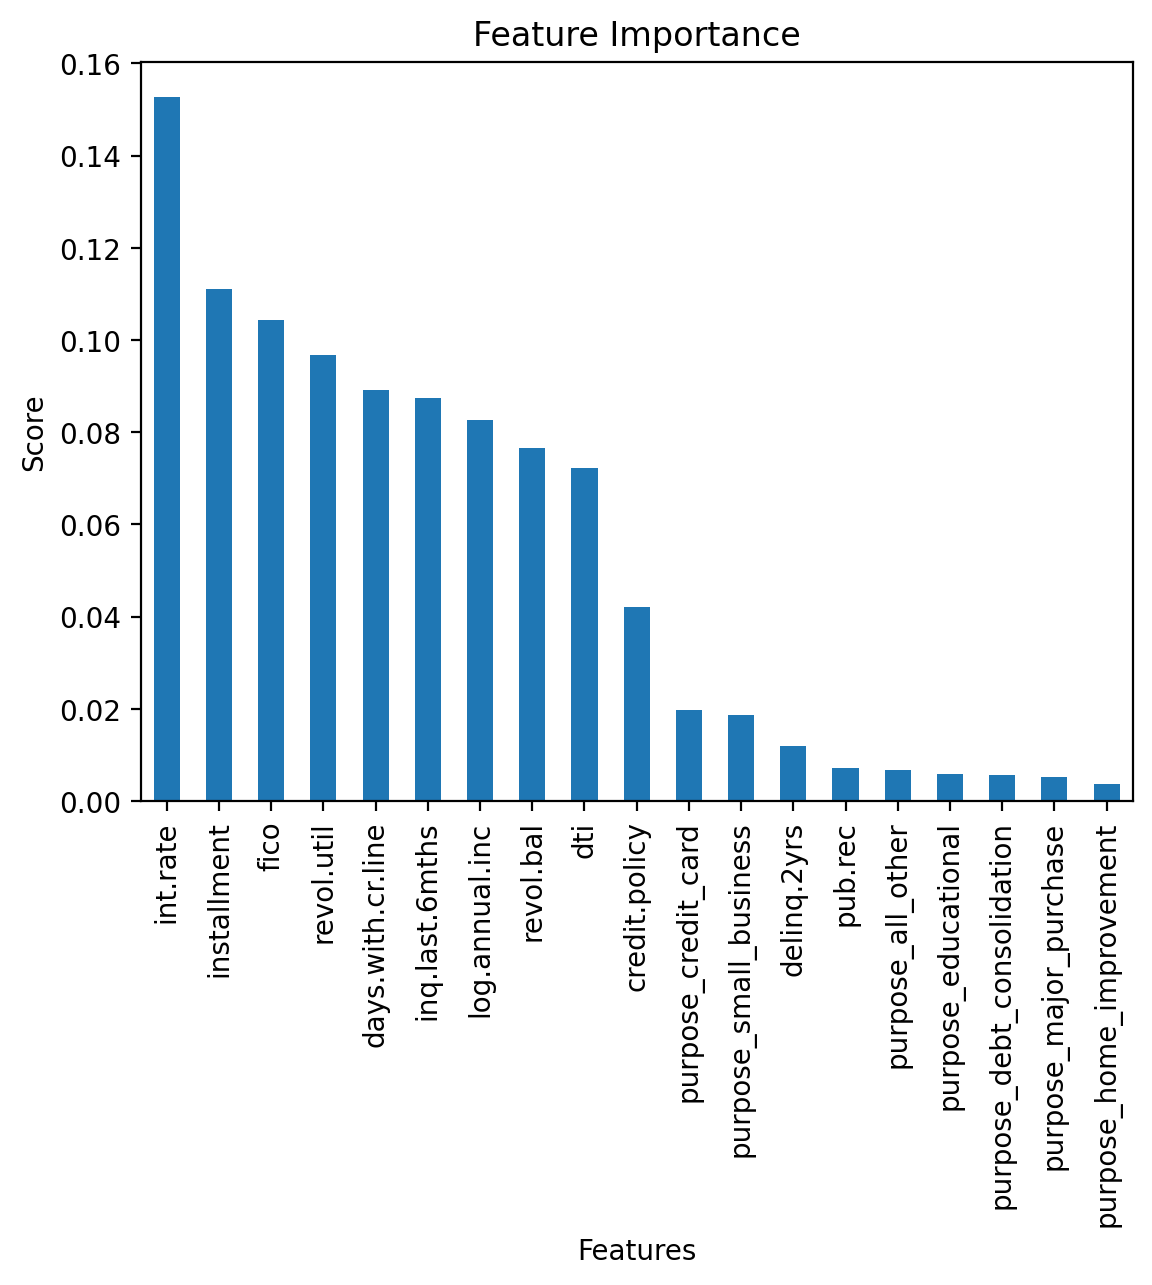

In [48]:
features = X_train.columns # get the names of the features
features_importances = best_hyper_parameters_rf.feature_importances_ # get the importance features
features_importances = pd.Series(features_importances, index = features).sort_values(ascending = False)
features_importances.plot(kind = 'bar') # plot a bar chart

plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Score')
plt.show()

# Q6

1. Default Adaboost classifier:
    - Initiate the Adaboost classifier from the sklearn library. Keep all parameters with their default values. (No need to specify anything)
    - Fit the model
    - Make predictions
    - Calculate accuracy score. What are the **training** and **validation** accuracies of the model?
    - Create confusion matrix
    - Provide the performance metrics for the **validation** set.
    
    
2. Using the training data perform hyper-parameter tuning. Use an appropriate metric for scoring (f1 is generally good).
    - Perform grid search (`GridSearchCV`) where you check for `learning_rate`, and `n_estimators`.
        - Using the best model provide the performance metrics for the validation set.
       
3. Create a chart showing the feature importances based on the best model obtained.

### Default Adaboost

In [50]:
from sklearn.ensemble import AdaBoostClassifier

ab = AdaBoostClassifier() # initiate model
ab.fit(X_train, y_train) # fit the model

pred_train_ab = ab.predict(X_train) # prediction on the training data
pred_val_ab = ab.predict(X_val) # prediction on the validation data
pred_test_ab = ab.predict(X_test) # prediction on the testing data

print("Training accuracy of the model is", accuracy_score(y_train, pred_train_ab))
print("Validation accuracy of the model is", accuracy_score(y_val, pred_val_ab))
print("Testing accuracy of the model is", accuracy_score(y_test, pred_test_ab))

Training accuracy of the model is 0.6739373601789709
Validation accuracy of the model is 0.5855704697986577
Testing accuracy of the model is 0.5979899497487438


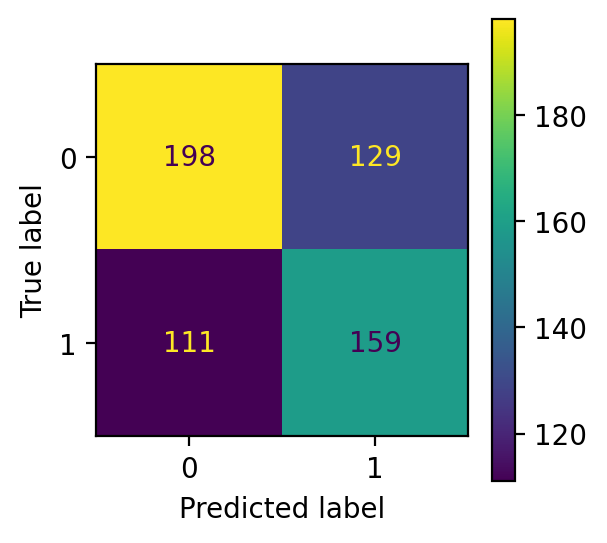

In [51]:
cm_test_ab = confusion_matrix(y_test, pred_test_ab) # generate the confusion matrix

fig, ax = plt.subplots(figsize = (3, 3))
ConfusionMatrixDisplay(confusion_matrix = cm_test_ab, display_labels = [0, 1]).plot(ax = ax)
plt.show()

### Hyper-parameter Tuning

In [52]:
ab = AdaBoostClassifier() # initiate model
hyper_parameters_ab = {'learning_rate': [0.01, 0.1, 1], # define the parameter grid
                       'n_estimators': [50, 100, 200]}
grid_search_ab = GridSearchCV(estimator = ab, param_grid = hyper_parameters_ab, cv = 10) # set up GridSearchCV
grid_search_ab.fit(X_train, y_train) # fit the data
print(f"The best hyper parameters are {grid_search_ab.best_params_}.")

The best hyper parameters are {'learning_rate': 0.1, 'n_estimators': 100}.


In [53]:
best_hyper_parameters_ab = grid_search_ab.best_estimator_ # get the best model
best_hyper_parameters_pred_val_ab = best_hyper_parameters_ab.predict(X_val) # prediction on the validation data

cm_best_hyper_parameters_ab = confusion_matrix(y_val, best_hyper_parameters_pred_val_ab) # generate the confusion matrix

# performance metrics
print('Recall score: ', recall_score(y_val, best_hyper_parameters_pred_val_ab))
print('Specificity: ', cm_best_hyper_parameters_ab[0, 0] / (cm_best_hyper_parameters_ab[0, 0] + cm_best_hyper_parameters_ab[0, 1]))
print('Precision score: ', precision_score(y_val, best_hyper_parameters_pred_val_ab))
print('Balanced Accuracy score: ',balanced_accuracy_score(y_val, best_hyper_parameters_pred_val_ab))
print('F1 score: ', f1_score(y_val, best_hyper_parameters_pred_val_ab))

Recall score:  0.5827586206896552
Specificity:  0.6111111111111112
Precision score:  0.5868055555555556
Balanced Accuracy score:  0.5969348659003832
F1 score:  0.5847750865051903


### Feature Importances

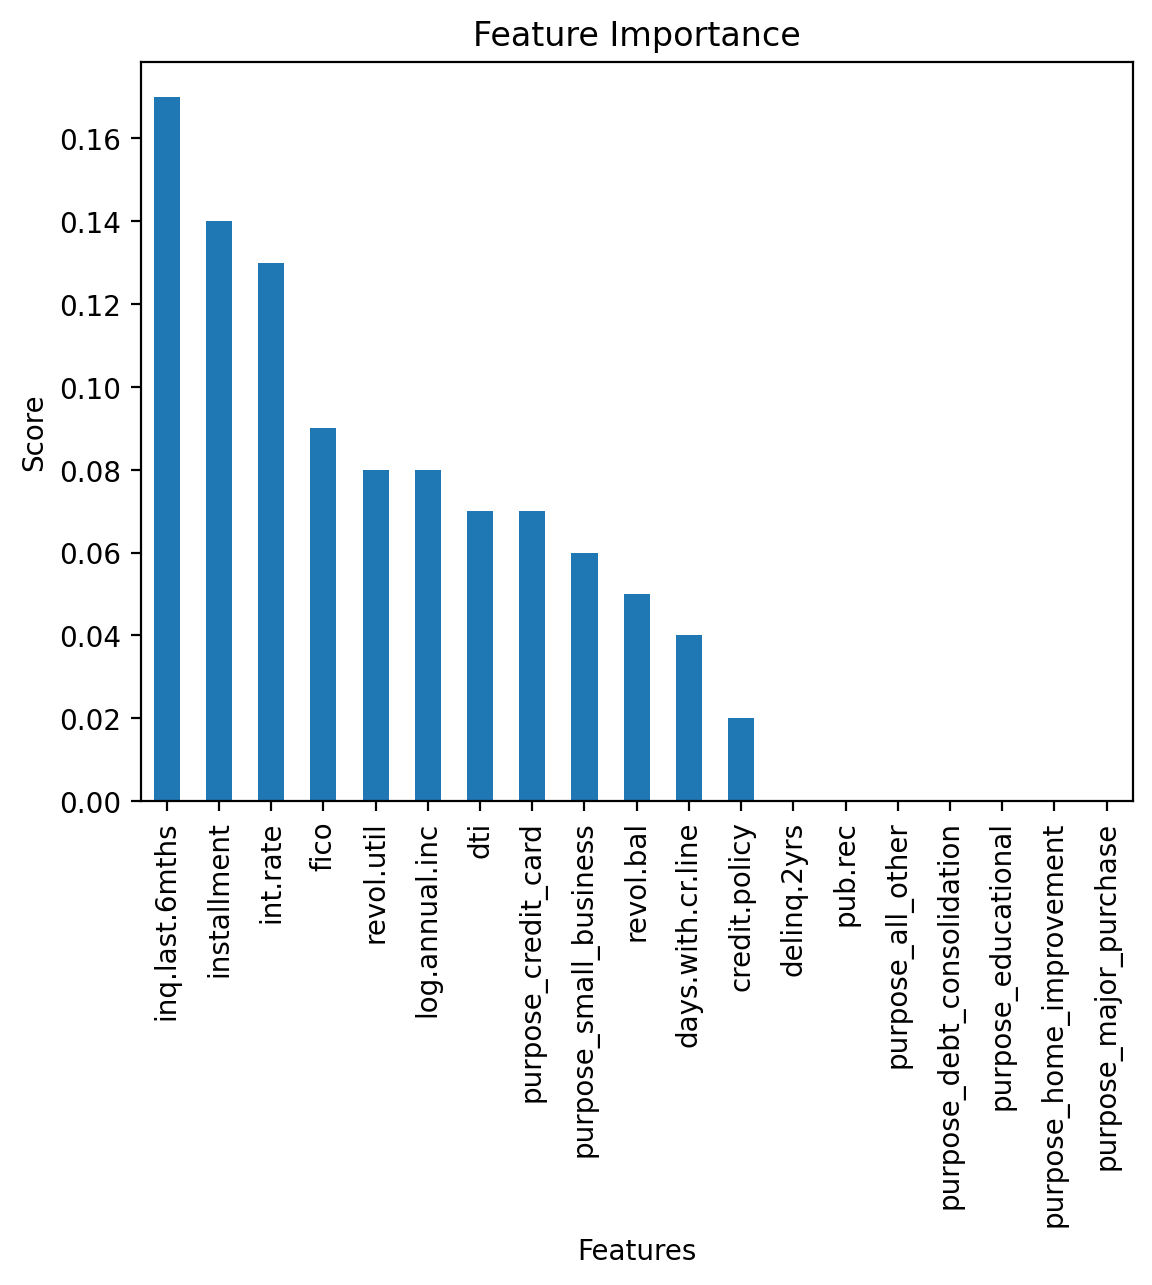

In [54]:
features = X_train.columns # get the names of the features
features_importances = best_hyper_parameters_ab.feature_importances_ # get the importance features
features_importances = pd.Series(features_importances, index = features).sort_values(ascending = False)
features_importances.plot(kind = 'bar') # plot a bar chart

plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Score')
plt.show()

# Q7

1. Default Gradient Boosting classifier:
    - Initiate the Gradient Boosting classifier from the sklearn library. Keep all parameters with their default values. (No need to specify anything)
    - Fit the model
    - Make predictions
    - Calculate accuracy score. What are the **training** and **validation** accuracies of the model?
    - Create confusion matrix
    - Provide the performance metrics for the **validation** set.
    
    
2. Using the training data perform hyper-parameter tuning. Use an appropriate metric for scoring (f1 is generally good).
    - Perform grid search (`GridSearchCV`) where you check for `learning_rate`, and `n_estimators`.
        - Using the best model provide the performance metrics for the validation set.
        
3. Create a chart showing the feature importances based on the best model obtained.

### Default Gradient Boosting

In [56]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier() # initiate model
gb.fit(X_train, y_train) # fit the model

pred_train_gb = gb.predict(X_train) # prediction on the training data
pred_val_gb = gb.predict(X_val) # prediction on the validation data
pred_test_gb = gb.predict(X_test) # prediction on the testing data

print("Training accuracy of the model is", accuracy_score(y_train, pred_train_gb))
print("Validation accuracy of the model is", accuracy_score(y_val, pred_val_gb))
print("Testing accuracy of the model is", accuracy_score(y_test, pred_test_gb))

Training accuracy of the model is 0.7986577181208053
Validation accuracy of the model is 0.610738255033557
Testing accuracy of the model is 0.6063651591289783


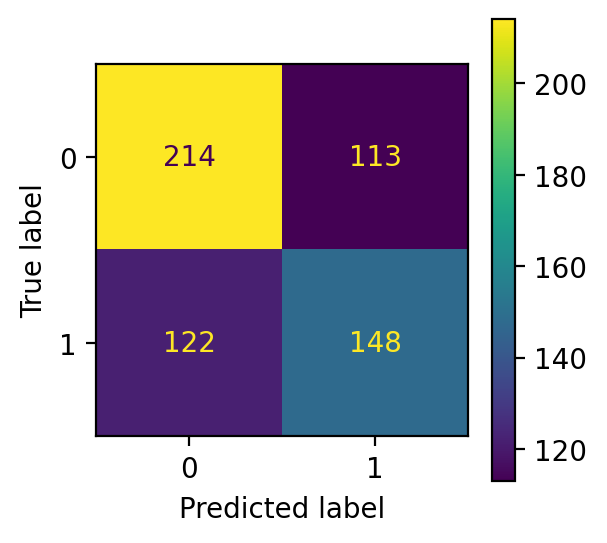

In [57]:
cm_test_gb = confusion_matrix(y_test, pred_test_gb) # generate the confusion matrix

fig, ax = plt.subplots(figsize = (3, 3))
ConfusionMatrixDisplay(confusion_matrix = cm_test_gb, display_labels = [0, 1]).plot(ax = ax)
plt.show()

### Hyper-parameter Tuning

In [58]:
gb = GradientBoostingClassifier() # initiate model
hyper_parameters_gb = {'learning_rate': [0.01, 0.1, 1], # define the parameter grid
                       'n_estimators': [50, 100, 200]}
grid_search_gb = GridSearchCV(estimator = gb, param_grid = hyper_parameters_gb, cv = 10) # set up GridSearchCV
grid_search_gb.fit(X_train, y_train) # fit the data
print(f"The best hyper parameters are {grid_search_gb.best_params_}.")

The best hyper parameters are {'learning_rate': 0.1, 'n_estimators': 50}.


In [59]:
best_hyper_parameters_gb = grid_search_gb.best_estimator_ # get the best model
best_hyper_parameters_pred_val_gb = best_hyper_parameters_gb.predict(X_val) # prediction on the validation data

cm_best_hyper_parameters_gb = confusion_matrix(y_val, best_hyper_parameters_pred_val_gb) # generate the confusion matrix

# performance metrics
print('Recall score: ', recall_score(y_val, best_hyper_parameters_pred_val_gb))
print('Specificity: ', cm_best_hyper_parameters_gb[0, 0] / (cm_best_hyper_parameters_gb[0, 0] + cm_best_hyper_parameters_gb[0, 1]))
print('Precision score: ', precision_score(y_val, best_hyper_parameters_pred_val_gb))
print('Balanced Accuracy score: ',balanced_accuracy_score(y_val, best_hyper_parameters_pred_val_gb))
print('F1 score: ', f1_score(y_val, best_hyper_parameters_pred_val_gb))

Recall score:  0.596551724137931
Specificity:  0.6241830065359477
Precision score:  0.6006944444444444
Balanced Accuracy score:  0.6103673653369394
F1 score:  0.5986159169550173


### Feature Importances

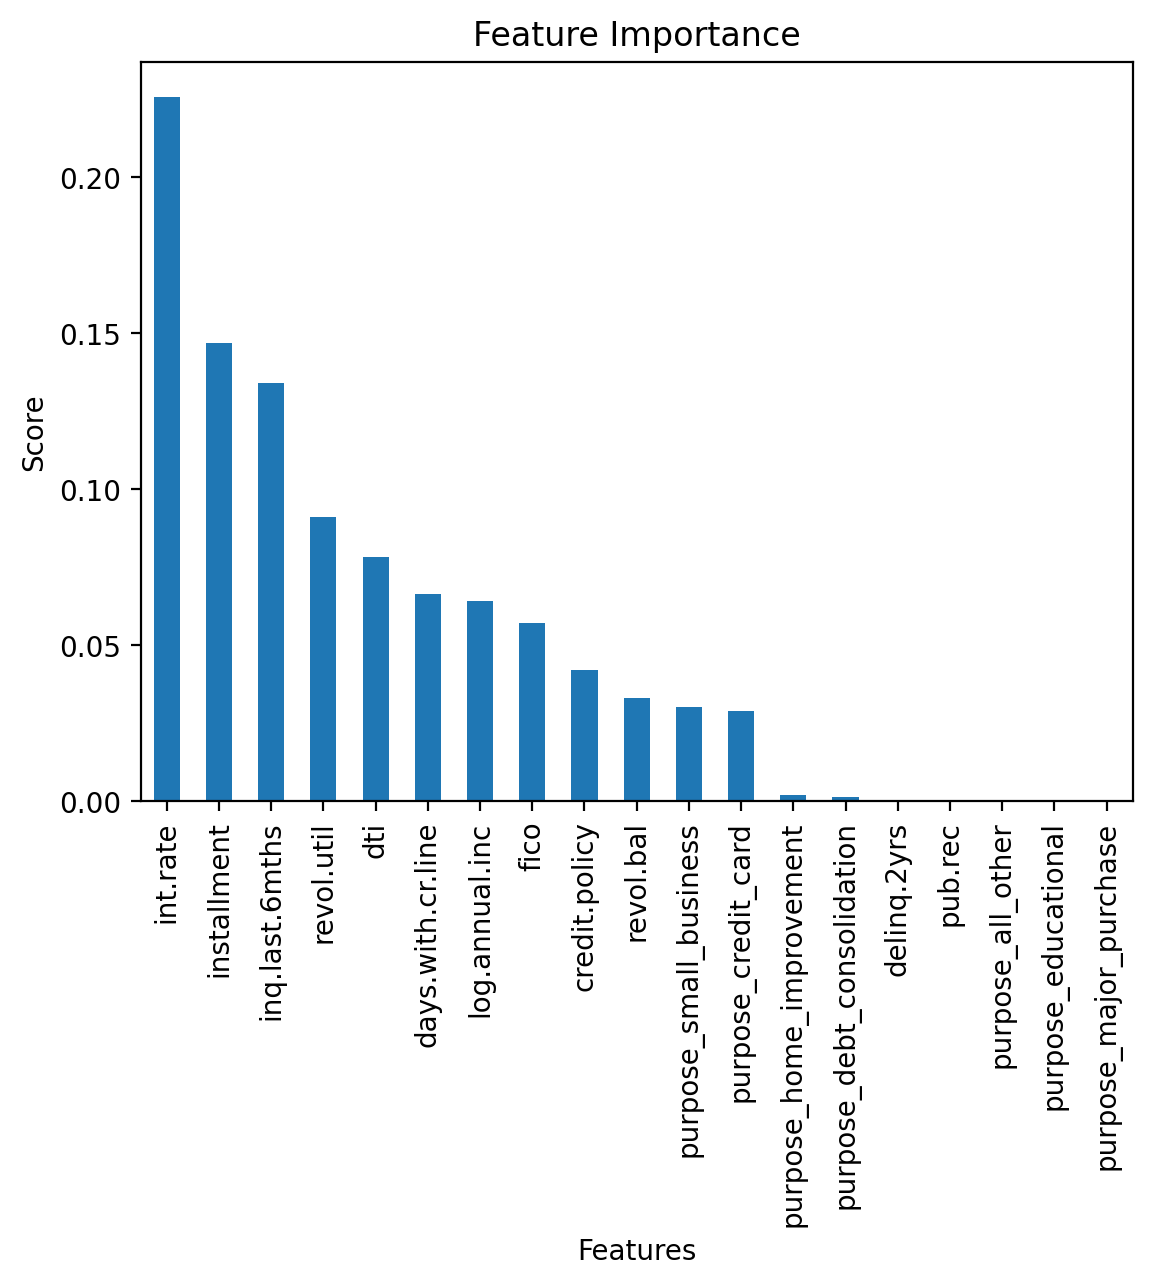

In [60]:
features = X_train.columns # get the names of the features
features_importances = best_hyper_parameters_gb.feature_importances_ # get the importance features
features_importances = pd.Series(features_importances, index = features).sort_values(ascending = False)
features_importances.plot(kind = 'bar') # plot a bar chart

plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Score')
plt.show()

# Q8

- Using one or more of the Decision Tree, Random Forest, Adaboost, and Gradient Boosting classifer models:
    - Think of other ways of improving the recall and F1-score and list at least two possibilities.
    - Implement both of the methods you proposed. 
    - Is the model F1-score increasing?

### Adjusting Class Weights

In [61]:
class_weights = compute_class_weight('balanced', classes = np.unique(y_train), y = y_train) # calculate class weights
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}
class_weights_rf = RandomForestClassifier(max_depth = 20, min_samples_split = 25, n_estimators = 200, class_weight = class_weights_dict)  # initiate model
class_weights_rf.fit(X_train, y_train) # fit the model

RandomForestClassifier(class_weight={0: 0.9770491803278688,
                                     1: 1.0240549828178693},
                       max_depth=20, min_samples_split=25, n_estimators=200)

In [62]:
# evaluate the model with adjusted class weights
class_weights_pred_val_rf = class_weights_rf.predict(X_val) # prediction on the validation data
print("F1 score with adjusted class weights:", f1_score(y_val, class_weights_pred_val_rf))
print('Original F1 score: ', f1_score(y_val, best_hyper_parameters_pred_val_rf))

F1 score with adjusted class weights: 0.6118421052631579
Original F1 score:  0.6148648648648649


There was no improvement in the F1 score with an adjusted class weights method compared to the best Random Forest classifier model's performance.

### Feature Engineering

In [95]:
threshold = 0.05
selected_features = features_importances[features_importances > threshold].index.tolist() # select features greater than the threshold

X_train_selected_features = X_train[selected_features] # extract selected features from the training set
X_val_selected_features = X_val[selected_features] # extract selected features from the validation set

selected_features_rf = RandomForestClassifier(max_depth = 20, min_samples_split = 25, n_estimators = 200) # initiate model
selected_features_rf.fit(X_train_selected_features, y_train)  # fit the model

RandomForestClassifier(max_depth=20, min_samples_split=25, n_estimators=200)

In [96]:
# evaluate the model with feature engineering class weights
selected_features_pred_val_rf = class_weights_rf.predict(X_val) # prediction on the validation data
print("F1 score with feature engineering:", f1_score(y_val, selected_features_pred_val_rf))
print('Original F1 score: ', f1_score(y_val, best_hyper_parameters_pred_val_rf))

F1 score with feature engineering: 0.6118421052631579
Original F1 score:  0.6148648648648649


There was no improvement in the F1 score with a feature engineering method compared to the best Random Forest classifier model's performance.

# Q9

- Choose the best fitted model for each of the classifiers (1 model for each of Decision Tree, Random Forest, Adaboost, and Gradient Boosting)
- Create a table summarizing results on the **test set**:
    - Create confusion matrix for each model
    - Provide the performance metrics on the test set for each model.

Which one is the winner among all?

In [73]:
# set the best fitted model - decision tree
best_hyper_parameters_dt = grid_search_dt.best_estimator_
best_hyper_parameters_pred_test_dt = best_hyper_parameters_dt.predict(X_test)

cm_best_hyper_parameters_dt = confusion_matrix(y_test, best_hyper_parameters_pred_test_dt)

In [74]:
# set the best fitted model - random forest
best_hyper_parameters_rf = grid_search_rf.best_estimator_
best_hyper_parameters_pred_test_rf = best_hyper_parameters_rf.predict(X_test)

cm_best_hyper_parameters_rf = confusion_matrix(y_test, best_hyper_parameters_pred_test_rf)

In [75]:
# set the best fitted model - adaboost
best_hyper_parameters_ab = grid_search_ab.best_estimator_
best_hyper_parameters_pred_test_ab = best_hyper_parameters_ab.predict(X_test)

cm_best_hyper_parameters_ab = confusion_matrix(y_test, best_hyper_parameters_pred_test_ab)

In [76]:
# set the best fitted model - gradient boosting
best_hyper_parameters_gb = grid_search_gb.best_estimator_
best_hyper_parameters_pred_test_gb = best_hyper_parameters_gb.predict(X_test)

cm_best_hyper_parameters_gb = confusion_matrix(y_test, best_hyper_parameters_pred_test_gb)

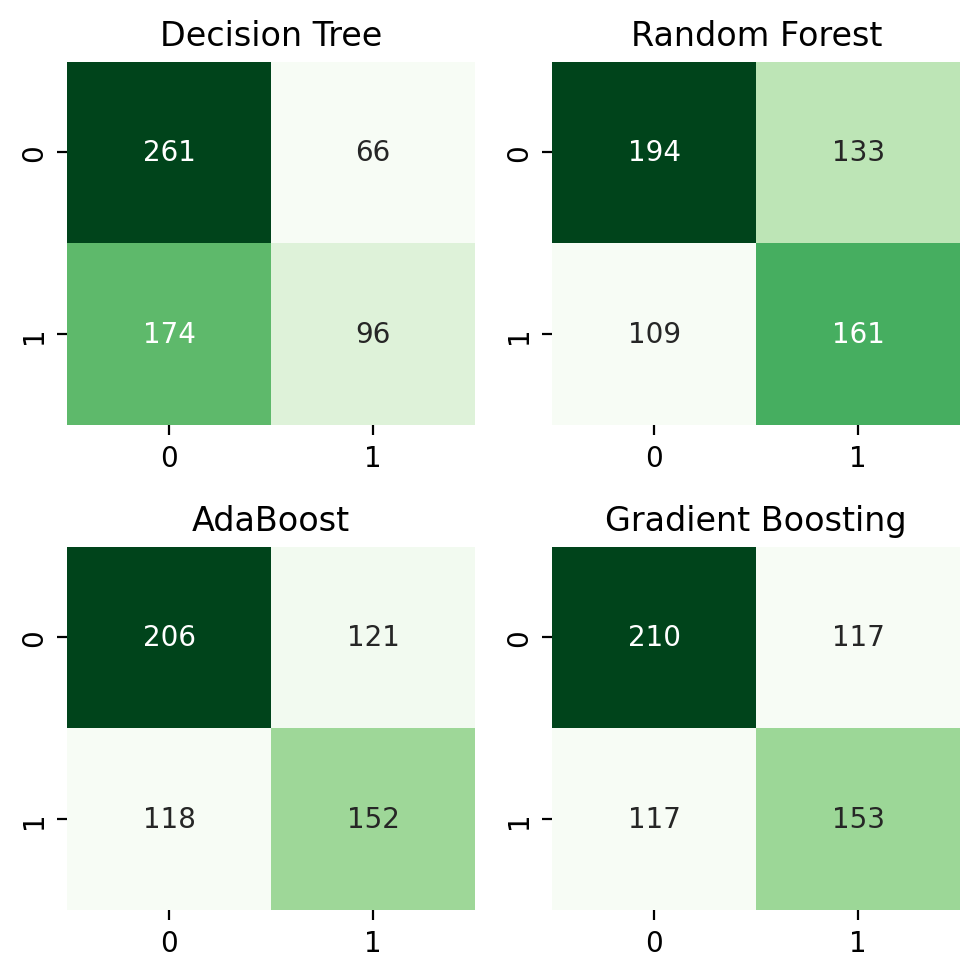

In [77]:
fig, axs = plt.subplots(2, 2, figsize=(5, 5))

models = ['Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting']
confusion_matrices = [cm_best_hyper_parameters_dt, cm_best_hyper_parameters_rf, cm_best_hyper_parameters_ab, cm_best_hyper_parameters_gb]

for ax, model, cm in zip(axs.flatten(), models, confusion_matrices):
    sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Greens', ax = ax, cbar = False)
    ax.set_title(model)

plt.tight_layout()
plt.show()

In [91]:
evaluation_results = {
    'Model': ['Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting'],
    'Recall': [recall_score(y_test, best_hyper_parameters_pred_test_dt), recall_score(y_test, best_hyper_parameters_pred_test_rf), recall_score(y_test, best_hyper_parameters_pred_test_ab), recall_score(y_test, best_hyper_parameters_pred_test_gb)],
    'Specificity': [cm_best_hyper_parameters_dt[0, 0] / (cm_best_hyper_parameters_dt[0, 0] + cm_best_hyper_parameters_dt[0, 1]), cm_best_hyper_parameters_rf[0, 0] / (cm_best_hyper_parameters_rf[0, 0] + cm_best_hyper_parameters_rf[0, 1]), cm_best_hyper_parameters_ab[0, 0] / (cm_best_hyper_parameters_ab[0, 0] + cm_best_hyper_parameters_ab[0, 1]), cm_best_hyper_parameters_gb[0, 0] / (cm_best_hyper_parameters_gb[0, 0] + cm_best_hyper_parameters_gb[0, 1])],
    'Precision': [precision_score(y_test, best_hyper_parameters_pred_test_dt), precision_score(y_test, best_hyper_parameters_pred_test_rf), precision_score(y_test, best_hyper_parameters_pred_test_ab), precision_score(y_test, best_hyper_parameters_pred_test_gb)],
    'Balanced Accuracy': [balanced_accuracy_score(y_test, best_hyper_parameters_pred_test_dt), balanced_accuracy_score(y_test, best_hyper_parameters_pred_test_rf), balanced_accuracy_score(y_test, best_hyper_parameters_pred_test_ab), balanced_accuracy_score(y_test, best_hyper_parameters_pred_test_gb)],
    'F1-score': [f1_score(y_test, best_hyper_parameters_pred_test_dt), f1_score(y_test, best_hyper_parameters_pred_test_rf), f1_score(y_test, best_hyper_parameters_pred_test_ab), f1_score(y_test, best_hyper_parameters_pred_test_gb)]
}
evaluation_results_df = pd.DataFrame(evaluation_results)
evaluation_results_df[['Recall', 'Specificity', 'Precision', 'Balanced Accuracy', 'F1-score']] = evaluation_results_df[['Recall', 'Specificity', 'Precision', 'Balanced Accuracy', 'F1-score']].apply(pd.to_numeric)
evaluation_results_df['Overall Performance'] = evaluation_results_df[['Recall', 'Specificity', 'Precision', 'Balanced Accuracy', 'F1-score']].mean(axis = 1)
evaluation_results_df

,Model,Recall,Specificity,Precision,Balanced Accuracy,F1-score,Overall Performance
0,Decision Tree,0.355556,0.798165,0.592593,0.576860,0.444444,0.553524
1,Random Forest,0.596296,0.593272,0.547619,0.594784,0.570922,0.580579
2,AdaBoost,0.562963,0.629969,0.556777,0.596466,0.559853,0.581206
3,Gradient Boosting,0.566667,0.642202,0.566667,0.604434,0.566667,0.589327


Based on overall performance, Gradient Boosting is the winner among all of the classifiers.